In [233]:
%matplotlib inline

import random

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# A: Matrix Standardization

In [234]:
def standardize(matrix):
    """Standardizes a data matrix by ensuring that its data has zero
    mean and unit variance."""
    
    mean = np.mean(matrix)
    std = np.std(matrix)
    return (matrix - mean) / std

In [235]:
random_factor = np.random.randint(-10, 11)
dummy_matrix = np.random.random([100, 100]) * random_factor
dummy_matrix

array([[ 1.73540703,  3.82818513,  3.91393695, ...,  3.71942456,
         2.78044406,  1.52144445],
       [ 2.36327565,  1.49892247,  0.44189949, ...,  1.47769355,
         2.34421831,  1.00612375],
       [ 0.62203871,  2.84793941,  1.27514482, ...,  3.40412417,
         1.73375006,  3.71146973],
       ..., 
       [ 2.65644224,  0.44993303,  3.128451  , ...,  1.78994526,
         1.34124911,  2.42107518],
       [ 1.96957791,  3.2196189 ,  0.61291323, ...,  2.50079882,
         1.86376487,  3.41168246],
       [ 0.99991443,  3.25635544,  3.44077437, ...,  1.75050958,
         1.17988872,  1.09873048]])

In [236]:
print("Old mean: %f" % np.mean(dummy_matrix))
print("Old std:  %f" % np.std(dummy_matrix))
std_matrix = standardize(dummy_matrix)
print("New mean: %f" % np.mean(std_matrix))
print("New std:  %f" % np.std(std_matrix))

Old mean: 2.004165
Old std:  1.150505
New mean: 0.000000
New std:  1.000000


# B: Pairwise Distances in the Plane

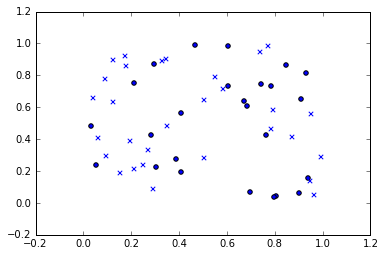

In [237]:
p = 25
q = 30
frame_1 = np.random.random([p, 2])
frame_2 = np.random.random([q, 2])
ax = plt.scatter(frame_1[:,0], frame_1[:, 1])
ax = plt.scatter(frame_2[:,0], frame_2[:, 1], marker='x')

In [238]:
def pairwise_distances(P, Q):
    return np.dot(P, Q.T)

pairwise_distances(frame_1, frame_2)

array([[ 0.23598565,  0.12772144,  0.18610025,  0.49690885,  0.17257653,
         0.37566336,  0.40279665,  0.09932613,  0.15387463,  0.24862615,
         0.3770968 ,  0.13534442,  0.23793088,  0.10285841,  0.43599959,
         0.09458347,  0.43607201,  0.31598192,  0.17476409,  0.41331744,
         0.40967218,  0.22352942,  0.50436839,  0.2601668 ,  0.33093502,
         0.46094307,  0.48245053,  0.14650303,  0.1430229 ,  0.30438843],
       [ 0.64520373,  0.31311492,  0.81226755,  1.00126511,  0.68713446,
         1.03877085,  0.4983804 ,  0.26032352,  0.47729111,  0.99518439,
         0.98617284,  0.22267205,  0.93460349,  0.43011487,  0.81720185,
         0.33336015,  0.95137661,  1.06059059,  0.45888022,  0.57836624,
         0.82676229,  0.94994095,  1.33730419,  0.51719408,  0.87906622,
         0.7533508 ,  1.28211158,  0.35085923,  0.67410908,  1.03395931],
       [ 0.30278839,  0.17963893,  0.10623352,  0.79365139,  0.12738871,
         0.47690551,  0.78016402,  0.13235384,  0

# C: Likelihood of a data sample

$$ p(x \mid \mu, \Sigma) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left( -\frac{1}{2}(x - \mu)^{T} \Sigma^{-1}(x - \mu) \right) $$

In [239]:
def log_likelihood(data, theta):
    """Computes the log likelihood of the data (x) given the model theta.
    See above for the full formula."""
    
    mu, sigma = theta
    d, _ = sigma.shape
    
    det = np.linalg.det(sigma)
    sigma_inv = np.linalg.inv(sigma)
    x_mu = data - mu
        
    log_denominator = np.log(2 * np.pi) * (d / 2) + 0.5 * np.log(det)
    exponent = -0.5 * np.sum(x_mu * np.dot(x_mu, sigma_inv), axis=1)
    
    return exponent - log_denominator


def max_likelihood(data, thetas):
    """Returns an index array which, for every row in the original data
    matrix, contains the index of the model with the maximum likelihood."""
    results = np.array([log_likelihood(data, theta) for theta in thetas])
    res = np.argmax(results, axis=0)
    return res

In [230]:
# The number of data points, the dimensionality of the data,
# and the models we want to try out.
n = 150
d = 2
model_count = 4

# The data matrix
X = np.random.random([n, d])

# The mus in the models.
mus = np.array([np.random.random(d) for _ in range(model_count)])

# The sigmas in the models.
# Use nicely-shaped clusters, as suggested by the TA sample implementation.
S = np.diag(np.random.rand(d, d).diagonal())
sigmas = [S] * model_count

thetas = zip(mus, sigmas)
ML = max_likelihood(X, thetas)

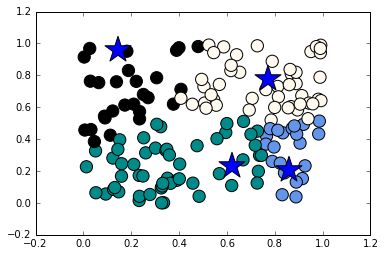

In [247]:
color_list = list(matplotlib.colors.cnames.keys())
random.shuffle(color_list)
colormap = np.array(color_list[:model_count])[ML]

ax = plt.scatter(X[:, 0], X[:, 1], c=colormap, s=150)
ax = plt.scatter(mus[:, 0], mus[:, 1], c='blue', s=750, marker='*')